In [1]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
pd.set_option('display.max_rows', None)


In [2]:
train = pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Data_Test.xlsx")

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train[train['Engine'].isnull()].head(100)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


In [5]:
# train[train['Model_Name'].str.contains('swift')].head(100)

In [6]:
def preprocesing(df):
    columns_to_split = ['Mileage','Engine','Power']
    for column in columns_to_split:
        df[[column + '_Value', column + '_Unit']] = df[column].str.split(' ', expand=True)
        df[column + '_Value']= df[column + '_Value'].replace('null', np.nan).astype(float) 
        df = df.drop(column, axis=1)
    df.drop(['Engine_Unit','Power_Unit','New_Price'],axis=1,inplace= True)
    df.dropna(subset=['Mileage_Value'],inplace= True)
   
    #cleaning Name column
    Fuel_Types = df['Fuel_Type'].unique()
    for Fuel_Type in Fuel_Types:
        df['Name'] = df['Name'].str.replace(Fuel_Type, '')
        
    df['Name'] = df['Name'].str.lower()
    
    name_corrections = [('cooper', ''),('land rover', 'Land-Rover'),('wagon r', 'wagon-r'), ('f type', 'f-type'),('range rover','range-rover'),
                        ('redi go', 'redi-go'),('grand i10','i10'),('grande punto','grande-punto'),('s cross','s-cross'),('kuv 100','kuv-100'),
                        ('grand vitara','grand-vitara'),('vitara brezza','vitara-brezza'),('alto 800','alto'),('alto k10','alto-k10'),
                        ('zen estilo','zen-estilo'),('innova crysta','innova-crysta'),('zest ','zest-'),('santro xing','santro-xing')
                       
                       ]
    for old, new in name_corrections:
        df['Name'] = df['Name'].str.replace(old, new)
        
    df[['Manufacturer_Name', 'Model_Name']] = df['Name'].str.split(' ',n=1, expand=True)
    df = df.drop('Name', axis=1)
    
    df['ABS'] = df['Model_Name'].str.contains('abs', case=False).astype(int)
    df['Model_Name'] = df['Model_Name'].str.replace('abs', '')

    # Extract BS version using regular expression
    df['BS_Version'] = df['Model_Name'].str.extract(r'(bs\s*-*[ivxlc123456]*\s*\d*)')
    df['Model_Name'] = df['Model_Name'].str.replace(r'(bs\s*-*[ivxlc123456]*\s*\d*)', '', regex=True).str.strip()
    df['BS_Version'] = df['BS_Version'].str.replace(r'\s*\-*','',regex=True)
    bs_version_mapping = {'bsiv': 4, 'bsiii': 3, 'bs3': 3, 'bsii': 2, np.nan: 0}
    df['BS_Version'] = df['BS_Version'].map(bs_version_mapping)
    
    df['Model_Name'] = df['Model_Name'].str.replace(r'(\d\s*-*seater)|(\d\s*-*str)', '', regex=True).str.strip()
    df['Model_Name'] = df['Model_Name'].str.replace(r'(20\d\d\s*-*20\d\d)', '', regex=True).str.strip()
    df['Model_Name'] = df['Model_Name'].str.replace(' at| mt| amt| automatic| manual', '',  regex=True).str.strip()
    
    df[['Model_subName', 'Model_specific']] = df['Model_Name'].str.split(' ',n=1, expand=True)
    
    columns_with_nulls = ['Seats', 'Engine_Value', 'Power_Value']
    for column in columns_with_nulls:
        df[column].fillna(df.groupby(['Manufacturer_Name'])[column].transform('mean'), inplace=True)
    df['Seats']=df['Seats'].round()
        
    df['Power_Value'].fillna(53.3, inplace=True)
    df['Model_specific'].fillna('std', inplace=True)
    
    return df


In [7]:
train['Seats'].unique()


array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [8]:
train = preprocesing(train)
test= preprocesing(test)

In [9]:
df= train

In [10]:
df.head(100)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Mileage_Unit,Engine_Value,Power_Value,Manufacturer_Name,Model_Name,ABS,BS_Version,Model_subName,Model_specific
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,km/kg,998.0,58.160000,maruti,wagon-r lxi,0,0,wagon-r,lxi
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,kmpl,1582.0,126.200000,hyundai,creta 1.6 crdi sx option,0,0,creta,1.6 crdi sx option
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,kmpl,1199.0,88.700000,honda,jazz v,0,0,jazz,v
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,kmpl,1248.0,88.760000,maruti,ertiga vdi,0,0,ertiga,vdi
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,kmpl,1968.0,140.800000,audi,a4 new 2.0 tdi multitronic,0,0,a4,new 2.0 tdi multitronic
5,Hyderabad,2012,75000,LPG,Manual,First,5.0,2.35,21.10,km/kg,814.0,55.200000,hyundai,eon era plus option,0,0,eon,era plus option
6,Jaipur,2013,86999,Diesel,Manual,First,5.0,3.50,23.08,kmpl,1461.0,63.100000,nissan,micra xv,0,0,micra,xv
7,Mumbai,2016,36000,Diesel,Automatic,First,8.0,17.50,11.36,kmpl,2755.0,171.500000,toyota,innova-crysta 2.8 gx 8s,0,0,innova-crysta,2.8 gx 8s
8,Pune,2013,64430,Diesel,Manual,First,5.0,5.20,20.54,kmpl,1598.0,103.600000,volkswagen,vento comfortline,0,0,vento,comfortline
9,Chennai,2012,65932,Diesel,Manual,Second,5.0,1.95,22.30,kmpl,1248.0,74.000000,tata,indica vista quadrajet ls,0,0,indica,vista quadrajet ls


In [11]:
Model_specific = " ".join(df['Model_specific'].str.strip().tolist())

In [12]:
Model_specific = Model_specific.split(' ')

In [13]:
Model_specific

['lxi',
 '1.6',
 'crdi',
 'sx',
 'option',
 'v',
 'vdi',
 'new',
 '2.0',
 'tdi',
 'multitronic',
 'era',
 'plus',
 'option',
 'xv',
 '2.8',
 'gx',
 '8s',
 'comfortline',
 'vista',
 'quadrajet',
 'ls',
 'zeta',
 '1.5',
 'v',
 'sunroof',
 'vdi',
 '2.2l',
 'pure',
 '2',
 'td4',
 'se',
 'sport',
 '4x4',
 's',
 'i-dtech',
 'ddis',
 'vdi',
 '85ps',
 '',
 'rxl',
 'plus',
 'c-class',
 'c',
 '220',
 'cdi',
 'be',
 'avantgare',
 'series',
 '320d',
 'ddis',
 '200',
 'alpha',
 '35',
 'tfsi',
 'technology',
 '1.2',
 'magna',
 'highline',
 'corporate',
 'edition',
 'xv',
 'vxi',
 'i-vtec',
 'vx',
 '2.5',
 'v',
 '110ps',
 '',
 'rxz',
 'pack',
 'altis',
 'g',
 'rexton',
 'rx7',
 '2.7',
 'tdi',
 '1.6',
 'highline',
 'lxi',
 'zdi',
 'plus',
 'mfalcon',
 'g80',
 'k6',
 '',
 'aw',
 'ml',
 '350',
 'cdi',
 'trendline',
 '1.2l',
 'lxi',
 'lx',
 'se',
 'mfalcon',
 'd75',
 'k8',
 'dual',
 'tone',
 'magna',
 'optional',
 '1.2',
 '2.0',
 'sx',
 'option',
 'altis',
 'g',
 'crdi',
 '2.7',
 'gx',
 '1.1',
 'crdi',
 

In [14]:
df[df['Model_Name'].str.contains('mt')].head(100)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Mileage_Unit,Engine_Value,Power_Value,Manufacturer_Name,Model_Name,ABS,BS_Version,Model_subName,Model_specific


In [15]:
df['Model_Name'].unique().tolist()

['wagon-r lxi',
 'creta 1.6 crdi sx option',
 'jazz v',
 'ertiga vdi',
 'a4 new 2.0 tdi multitronic',
 'eon  era plus option',
 'micra  xv',
 'innova-crysta 2.8 gx 8s',
 'vento  comfortline',
 'indica vista quadrajet ls',
 'ciaz zeta',
 'city 1.5 v sunroof',
 'swift vdi',
 'range-rover 2.2l pure',
 'freelander 2 td4 se',
 'pajero sport 4x4',
 'amaze s i-dtech',
 'swift ddis vdi',
 'duster 85ps  rxl plus',
 'new c-class c 220 cdi be avantgare',
 '3 series 320d',
 's-cross ddis 200 alpha',
 'a6  35 tfsi technology',
 'i20 1.2 magna',
 'vento  highline',
 'city corporate edition',
 'alto-k10  vxi',
 'wrv i-vtec vx',
 'innova 2.5 v',
 'duster 110ps  rxz pack',
 'corolla altis g',
 'ssangyong rexton rx7',
 'a6 2.7 tdi',
 'vento 1.6 highline',
 'vitara-brezza zdi plus',
 'kuv-100 mfalcon g80 k6  aw',
 'm-class ml 350 cdi',
 'polo  trendline 1.2l',
 'alto lxi',
 'nano lx se',
 'kuv-100 mfalcon d75 k8 dual tone',
 'i20 magna optional 1.2',
 'elantra 2.0 sx option',
 'elantra crdi',
 'innova-cr

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6017 non-null   object 
 1   Year               6017 non-null   int64  
 2   Kilometers_Driven  6017 non-null   int64  
 3   Fuel_Type          6017 non-null   object 
 4   Transmission       6017 non-null   object 
 5   Owner_Type         6017 non-null   object 
 6   Seats              6017 non-null   float64
 7   Price              6017 non-null   float64
 8   Mileage_Value      6017 non-null   float64
 9   Mileage_Unit       6017 non-null   object 
 10  Engine_Value       6017 non-null   float64
 11  Power_Value        6017 non-null   float64
 12  Manufacturer_Name  6017 non-null   object 
 13  Model_Name         6017 non-null   object 
 14  ABS                6017 non-null   int32  
 15  BS_Version         6017 non-null   int64  
 16  Model_subName      6017 

def preprocesing(df):
    columns_to_split = ['Mileage','Engine','Power']
    for column in columns_to_split:
        df[[column + '_Value', column + '_Unit']] = df[column].str.split(' ', expand=True)
        df[column + '_Value']= df[column + '_Value'].replace('null', np.nan).astype(float) 
        df = df.drop(column, axis=1)
    df.drop(['Engine_Unit','Power_Unit','New_Price'],axis=1,inplace= True)
    df.dropna(subset=['Mileage_Value'],inplace= True)
   
    #cleaning Name column
    Fuel_Types = df['Fuel_Type'].unique()
    for Fuel_Type in Fuel_Types:
        df['Name'] = df['Name'].str.replace(Fuel_Type, '')
        
    df['Name'] = df['Name'].str.replace('Cooper', '').replace('Land Rover', 'Land_Rover')

    df['Name'] = df['Name'].str.lower()

    df[['Manufacturer_Name', 'Model_Name']] = df['Name'].str.split(' ',n=1, expand=True)
#     df = df.drop('Name', axis=1)
    
    name_corrections = [('wagon r', 'wagon-r'), ('f type', 'f-type'), ('redi go', 'redi-go'),('grand i10','i10')]
    for old, new in name_corrections:
        df['Model_Name'] = df['Model_Name'].str.replace(old, new)
    
    df['ABS'] = df['Model_Name'].str.contains('abs', case=False).astype(int)
    df['Model_Name'] = df['Model_Name'].str.replace('abs', '')

    # Extract BS version using regular expression
    df['BS_Version'] = df['Model_Name'].str.extract(r'(bs\s*-*[ivxlc123456]*\s*\d*)')
    df['Model_Name'] = df['Model_Name'].str.replace(r'(bs\s*-*[ivxlc123456]*\s*\d*)', '', regex=True).str.strip()
    df['BS_Version'] = df['BS_Version'].str.replace(r'\s*\-*','',regex=True)
    bs_version_mapping = {'bsiv': 4, 'bsiii': 3, 'bs3': 3, 'bsii': 2, np.nan: 0}
    df['BS_Version'] = df['BS_Version'].map(bs_version_mapping)
    
    df[['Model_subName', 'Model_specific']] = df['Model_Name'].str.split(' ',n=1, expand=True)
    
    columns_with_nulls = ['Seats', 'Engine_Value', 'Power_Value']
    for column in columns_with_nulls:
        df[column] = df[column].fillna(df.groupby(['Manufacturer_Name'])[column].transform('mean'))
        
    df['Power_Value'] = df['Power_Value'].fillna(53.3)
    
    return df


In [17]:
# train = preprocesing(train)
# test= preprocesing(test)

In [18]:
# Create a summary table for datasets

table = PrettyTable()
table.field_names = ["Column Name", "Unique Train", "Unique Test", "Data Type", "Minimum", "Maximum", "Null Train", "Test Null"]
table.max_width = 20
for column in test.columns:
    unique_values_train = train[column].nunique()
    unique_values_test = test[column].nunique()
    data_type = train[column].dtype
    minimum = train[column].min()
    maximum = train[column].max()
    null_count = train[column].isnull().sum()
    test_null_count = test[column].isnull().sum()

    table.add_row([column, unique_values_train, unique_values_test, data_type, minimum, maximum, null_count, test_null_count])

print(table)


+-------------------+--------------+-------------+-----------+--------------------+----------------------+------------+-----------+
|    Column Name    | Unique Train | Unique Test | Data Type |      Minimum       |       Maximum        | Null Train | Test Null |
+-------------------+--------------+-------------+-----------+--------------------+----------------------+------------+-----------+
|      Location     |      11      |      11     |   object  |     Ahmedabad      |         Pune         |     0      |     0     |
|        Year       |      22      |      20     |   int64   |        1998        |         2019         |     0      |     0     |
| Kilometers_Driven |     3093     |     755     |   int64   |        171         |       6500000        |     0      |     0     |
|     Fuel_Type     |      4       |      4      |   object  |        CNG         |        Petrol        |     0      |     0     |
|    Transmission   |      2       |      2      |   object  |     Automatic

In [19]:
# Categorize columns into categorical, continuous, and discrete
categorical_columns = train.select_dtypes(include=['object']).columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

continuous_columns = []
discrete_columns = []

for column in train.columns:
    unique_values = train[column].nunique()
    if unique_values > 50 and train[column].dtype != 'object':
        continuous_columns.append(column)
    else:
        discrete_columns.append(column)

print("Categorical Columns:\n", ',  '.join(categorical_columns),"\n\n")
print("numeric columns:\n", ',  '.join(numeric_columns),"\n\n")
print("Continuous Columns:\n", ',  '.join(continuous_columns), "\n\n")
print("Discrete Columns:\n", ',  '.join(discrete_columns))

Categorical Columns:
 Location,  Fuel_Type,  Transmission,  Owner_Type,  Mileage_Unit,  Manufacturer_Name,  Model_Name,  Model_subName,  Model_specific 


numeric columns:
 Year,  Kilometers_Driven,  Seats,  Price,  Mileage_Value,  Engine_Value,  Power_Value,  BS_Version 


Continuous Columns:
 Kilometers_Driven,  Price,  Mileage_Value,  Engine_Value,  Power_Value 


Discrete Columns:
 Location,  Year,  Fuel_Type,  Transmission,  Owner_Type,  Seats,  Mileage_Unit,  Manufacturer_Name,  Model_Name,  ABS,  BS_Version,  Model_subName,  Model_specific


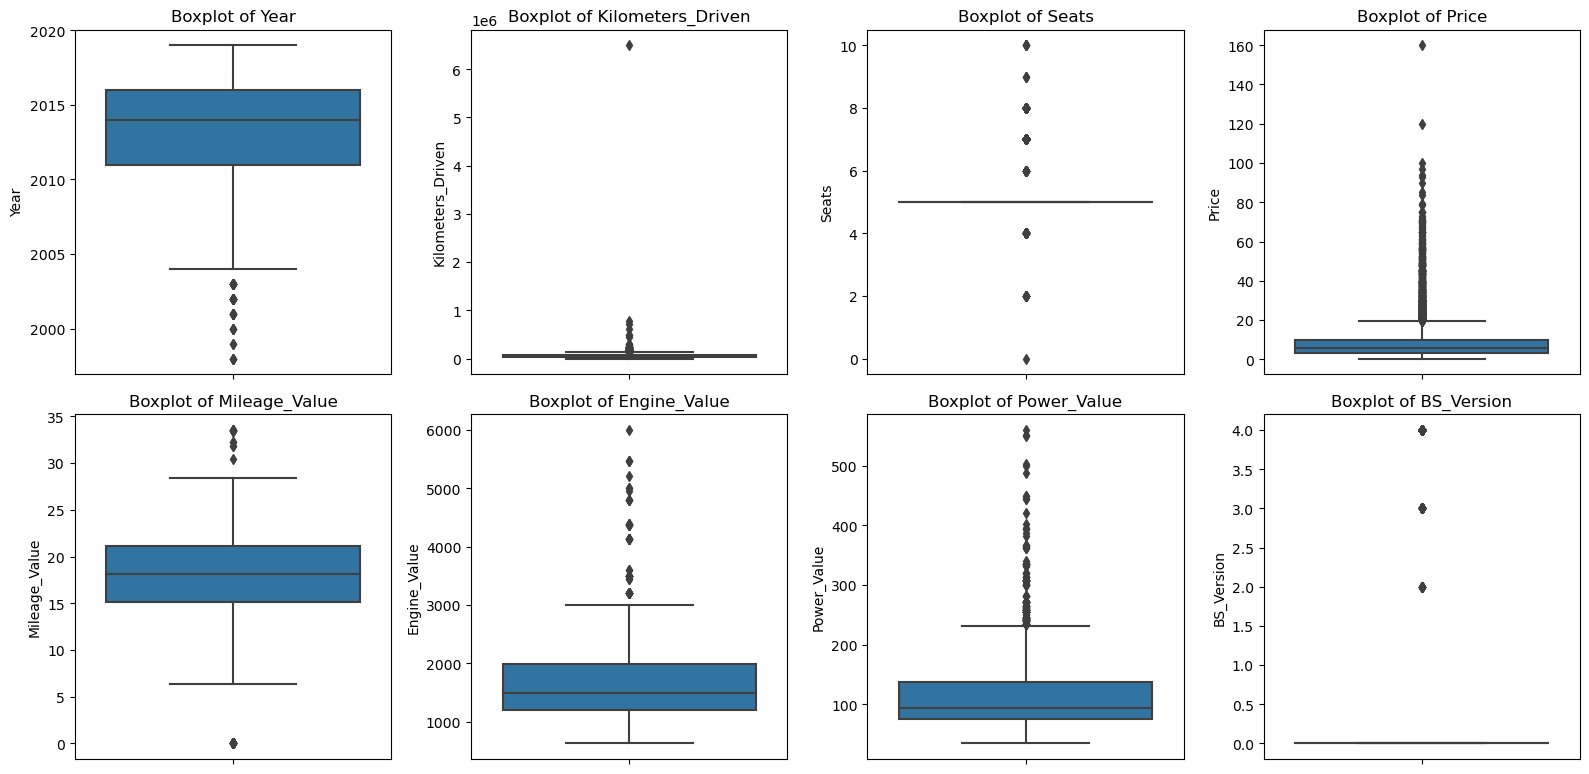

In [20]:
plt.figure(figsize=(16,8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=train[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [21]:
train[train['Kilometers_Driven'] >1000000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Mileage_Unit,Engine_Value,Power_Value,Manufacturer_Name,Model_Name,ABS,BS_Version,Model_subName,Model_specific
2328,Chennai,2017,6500000,Diesel,Automatic,First,5.0,65.0,15.97,kmpl,2993.0,258.0,bmw,x5 xdrive 30d m sport,0,0,x5,xdrive 30d m sport


In [22]:
train.loc[2328, 'Kilometers_Driven'] = 650000

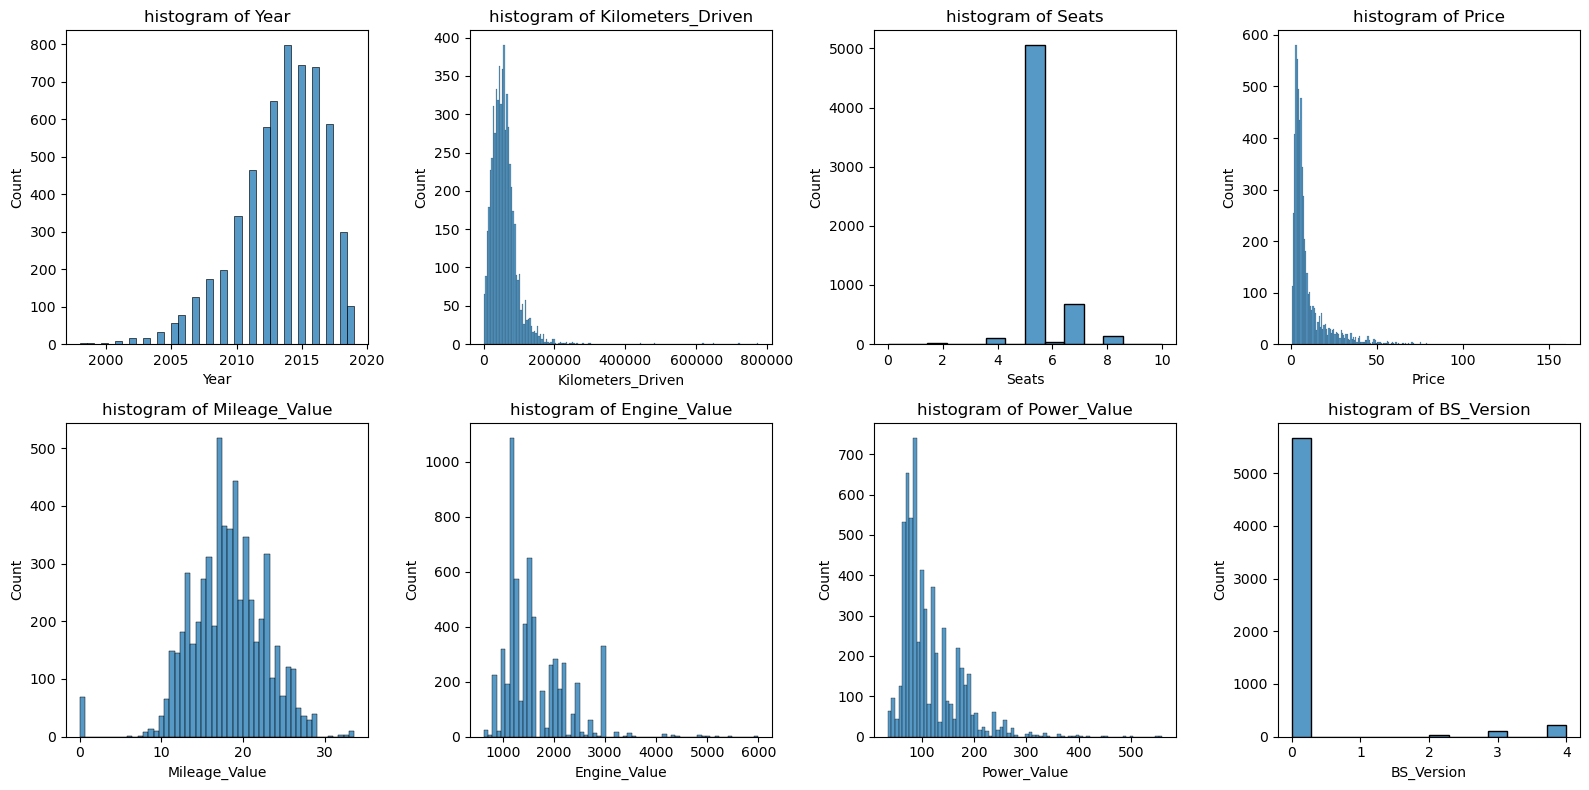

In [23]:
plt.figure(figsize=(16,8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(x=train[column])
    plt.title(f'histogram of {column}')

plt.tight_layout()
plt.show()



In [24]:
def log_transform(df):
    for column in columns_to_log_trans:
        df[column+"_log"] = np.log1p(df[column])
    return df

In [25]:
columns_to_log_trans=['Kilometers_Driven','Engine_Value','Power_Value']

In [26]:
train = log_transform(train)
test = log_transform(test)

In [27]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

combined_df = pd.concat([train[categorical_columns], test[categorical_columns]], axis=0)
for column in categorical_columns:
    combined_df[column]=le.fit_transform(combined_df[column])
    test[column] = le.transform(test[column])
    train[column] = le.transform(train[column])

In [28]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Mileage_Unit,...,Power_Value,Manufacturer_Name,Model_Name,ABS,BS_Version,Model_subName,Model_specific,Kilometers_Driven_log,Engine_Value_log,Power_Value_log
0,9,2010,72000,0,1,0,5.0,1.75,26.60,0,...,58.16,18,1606,0,0,199,1059,11.184435,6.906755,4.080246
1,10,2015,41000,1,1,0,5.0,12.50,19.67,1,...,126.20,12,426,0,0,57,375,10.621352,7.367077,4.845761
2,2,2011,46000,3,1,0,5.0,4.50,18.20,1,...,88.70,11,952,0,0,108,1330,10.736418,7.090077,4.496471
3,2,2012,87000,1,1,0,7.0,6.00,20.77,1,...,88.76,18,592,0,0,72,1352,11.373675,7.130099,4.497139
4,3,2013,40670,1,0,2,5.0,17.74,15.20,1,...,140.80,2,103,0,0,12,1115,10.613271,7.585281,4.954418


In [29]:
X= train.drop(['Price'],axis=1)
y=train['Price']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [32]:


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'k-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=3000),
    'Gaussian Process': GaussianProcessRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(verbose=0),
    'CatBoost': CatBoostRegressor(verbose=0) 
}

# Train the models and evaluate
best_model = None
best_mse = float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(X_test,y_test)
    
    print(f"Mean Squared Error ({name}): {mse} , Score : {score}")
    
 
    if mse < best_mse:
        best_mse = mse
        best_score= score
        best_model = model

print(f"The best model is {type(best_model).__name__} with an MSE of {best_mse} and score {best_score}")


Mean Squared Error (Linear Regression): 35.8082208275816 , Score : 0.7292291212210567
Mean Squared Error (Ridge Regression): 35.838398309687996 , Score : 0.7290009282765194


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.974e+03, tolerance: 5.940e+01
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error (Lasso Regression): 40.691206284246014 , Score : 0.6923054698189905
Mean Squared Error (Random Forest): 19.302250355119195 , Score : 0.8540422514641932
Mean Squared Error (Gradient Boosting): 20.42595723335218 , Score : 0.8455451217024508
Mean Squared Error (Support Vector Machine): 139.7215753286065 , Score : -0.056532071734886946
Mean Squared Error (k-Nearest Neighbors): 70.72381492026578 , Score : 0.46520801441747994
Mean Squared Error (Neural Network): 50.48871324596353 , Score : 0.6182197010051527
Mean Squared Error (Gaussian Process): 223.90813255342616 , Score : -0.6931252214168719
Mean Squared Error (XGBoost): 15.943748151396383 , Score : 0.8794382240108822
Mean Squared Error (LightGBM): 16.716376225482364 , Score : 0.8735958454242199
Mean Squared Error (CatBoost): 16.061253268763156 , Score : 0.8785496860395705
The best model is XGBRegressor with an MSE of 15.943748151396383 and score 0.8794382240108822


In [33]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for CatBoost
top_params_catboost = []

# Define the objective function for CatBoost optimization
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0),
    }
    model = CatBoostRegressor(**params, verbose=0)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for CatBoost
    top_params_catboost.append((mse, params))
    top_params_catboost.sort()

    return mse

# Create the Optuna study and optimize the objective function for CatBoost
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=50)

# Print the top 3 best parameters for CatBoost
print("Top 3 Best Parameters for CatBoost:")
for i, (mse, params) in enumerate(top_params_catboost[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-10 20:54:50,754] A new study created in memory with name: no-name-71020190-424c-4cc7-b6dd-2ce964fb0da7
[I 2024-05-10 20:55:00,124] Trial 0 finished with value: 11.072679777980424 and parameters: {'iterations': 1083, 'depth': 6, 'learning_rate': 0.13104193403563044, 'random_strength': 0.27357216747546076, 'bagging_temperature': 0.3030947337427453, 'border_count': 228, 'l2_leaf_reg': 0.22026732555502856}. Best is trial 0 with value: 11.072679777980424.
[I 2024-05-10 20:55:01,758] Trial 1 finished with value: 11.858576427259198 and parameters: {'iterations': 122, 'depth': 8, 'learning_rate': 0.2885054093185057, 'random_strength': 0.7486031420577929, 'bagging_temperature': 0.04114953098646312, 'border_count': 245, 'l2_leaf_reg': 6.371009325826948}. Best is trial 0 with value: 11.072679777980424.
[I 2024-05-10 20:55:07,561] Trial 2 finished with value: 10.057200452567145 and parameters: {'iterations': 576, 'depth': 8, 'learning_rate': 0.20680044167951875, 'random_strength': 0.408

[I 2024-05-10 20:59:19,341] Trial 24 finished with value: 9.885267372018848 and parameters: {'iterations': 888, 'depth': 9, 'learning_rate': 0.11102803485098245, 'random_strength': 0.4770230558708583, 'bagging_temperature': 0.44363604320826533, 'border_count': 165, 'l2_leaf_reg': 2.632073617618948}. Best is trial 23 with value: 9.552558738106484.
[I 2024-05-10 20:59:27,257] Trial 25 finished with value: 10.368753768810615 and parameters: {'iterations': 1128, 'depth': 7, 'learning_rate': 0.1480938792723402, 'random_strength': 0.525228038896854, 'bagging_temperature': 0.5680773243234238, 'border_count': 192, 'l2_leaf_reg': 3.7647804465756973}. Best is trial 23 with value: 9.552558738106484.
[I 2024-05-10 20:59:30,498] Trial 26 finished with value: 10.588344713270558 and parameters: {'iterations': 684, 'depth': 6, 'learning_rate': 0.06972288233531916, 'random_strength': 0.40400045389384975, 'bagging_temperature': 0.3597918759189808, 'border_count': 175, 'l2_leaf_reg': 4.842999701171437}. 

[I 2024-05-10 21:03:06,491] Trial 48 finished with value: 10.504402724116456 and parameters: {'iterations': 758, 'depth': 8, 'learning_rate': 0.19343194014520507, 'random_strength': 0.26815392469926846, 'bagging_temperature': 0.4621187387776651, 'border_count': 67, 'l2_leaf_reg': 3.486480035081264}. Best is trial 32 with value: 9.25110644839388.
[I 2024-05-10 21:03:14,410] Trial 49 finished with value: 9.76996865145509 and parameters: {'iterations': 815, 'depth': 7, 'learning_rate': 0.15867504754023876, 'random_strength': 0.19327424851250347, 'bagging_temperature': 0.5326809487985494, 'border_count': 153, 'l2_leaf_reg': 2.5663602416003504}. Best is trial 32 with value: 9.25110644839388.


Top 3 Best Parameters for CatBoost:
  Rank 1: Mean Squared Error = 9.25110644839388, Parameters = {'iterations': 847, 'depth': 8, 'learning_rate': 0.14160009006479568, 'random_strength': 0.4542821896814169, 'bagging_temperature': 0.36327883067280897, 'border_count': 200, 'l2_leaf_reg': 2.2235327850222015}
  Rank 2: Mean Squared Error = 9.38993539969051, Parameters = {'iterations': 821, 'depth': 8, 'learning_rate': 0.16294082565718535, 'random_strength': 0.355730716119877, 'bagging_temperature': 0.334699535235102, 'border_count': 228, 'l2_leaf_reg': 1.048614918651805}
  Rank 3: Mean Squared Error = 9.417846922938047, Parameters = {'iterations': 615, 'depth': 8, 'learning_rate': 0.1881137716064419, 'random_strength': 0.30535976641965545, 'bagging_temperature': 0.4958387695704377, 'border_count': 127, 'l2_leaf_reg': 2.695938950987326}


In [34]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for LightGBM
top_params_lightgbm = []

# Define the objective function for LightGBM optimization
def objective_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.35),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
#     params = {
#     'n_estimators': trial.suggest_int('n_estimators', 50, 5000),
#     'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
#     'max_depth': trial.suggest_int('max_depth', -1, 20),  # -1 means no limit
#     'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 1.0),
#     'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#     'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#     'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#     'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf']),
#     'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#     'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
#     'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
#     'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
#     'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
#     'subsample_freq': trial.suggest_int('subsample_freq', 0, 10),
#     'random_state': 42,
#     'n_jobs': trial.suggest_categorical('n_jobs', [None, -1, 1]),  # Use -1 for all threads, None for default
# }
    model = LGBMRegressor( **params,verbose=-1)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for LightGBM
    top_params_lightgbm.append((mse, params))
    top_params_lightgbm.sort()

    return mse

# Create the Optuna study and optimize the objective function for LightGBM
study_lightgbm = optuna.create_study(direction='minimize')
study_lightgbm.optimize(objective_lightgbm, n_trials=50)

# Print the top 3 best parameters for LightGBM
print("Top 3 Best Parameters for LightGBM:")
for i, (mse, params) in enumerate(top_params_lightgbm[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-10 21:03:14,460] A new study created in memory with name: no-name-b89ab1ba-c1fe-4073-b224-684275c7fc3a
[I 2024-05-10 21:03:15,719] Trial 0 finished with value: 11.875386432019214 and parameters: {'n_estimators': 515, 'max_depth': 4, 'num_leaves': 67, 'learning_rate': 0.08342616833257976, 'subsample': 0.9837248353765824, 'colsample_bytree': 0.8753190202062857}. Best is trial 0 with value: 11.875386432019214.
[I 2024-05-10 21:03:22,571] Trial 1 finished with value: 10.797639285047728 and parameters: {'n_estimators': 927, 'max_depth': 8, 'num_leaves': 94, 'learning_rate': 0.12450359067046622, 'subsample': 0.9467270487512842, 'colsample_bytree': 0.6657138816892474}. Best is trial 1 with value: 10.797639285047728.
[I 2024-05-10 21:03:30,911] Trial 2 finished with value: 9.320497738495675 and parameters: {'n_estimators': 1053, 'max_depth': 10, 'num_leaves': 53, 'learning_rate': 0.14622467303313538, 'subsample': 0.6549326035487733, 'colsample_bytree': 0.7399765097930562}. Best is t

[I 2024-05-10 21:04:43,942] Trial 27 finished with value: 10.005191032765945 and parameters: {'n_estimators': 1377, 'max_depth': 10, 'num_leaves': 24, 'learning_rate': 0.14338682968183755, 'subsample': 0.7103505769571803, 'colsample_bytree': 0.635742365982794}. Best is trial 2 with value: 9.320497738495675.
[I 2024-05-10 21:04:48,060] Trial 28 finished with value: 10.245649336310873 and parameters: {'n_estimators': 1084, 'max_depth': 8, 'num_leaves': 37, 'learning_rate': 0.25100157928923417, 'subsample': 0.6419912335730886, 'colsample_bytree': 0.6939981668807753}. Best is trial 2 with value: 9.320497738495675.
[I 2024-05-10 21:04:49,204] Trial 29 finished with value: 12.288068328631153 and parameters: {'n_estimators': 679, 'max_depth': 4, 'num_leaves': 60, 'learning_rate': 0.19076063634796908, 'subsample': 0.6075992897386672, 'colsample_bytree': 0.7890257911080166}. Best is trial 2 with value: 9.320497738495675.
[I 2024-05-10 21:04:49,936] Trial 30 finished with value: 10.4073448723254

Top 3 Best Parameters for LightGBM:
  Rank 1: Mean Squared Error = 9.110448550725419, Parameters = {'n_estimators': 954, 'max_depth': 9, 'num_leaves': 52, 'learning_rate': 0.12299865426847066, 'subsample': 0.6158558147808533, 'colsample_bytree': 0.5376955808637683}
  Rank 2: Mean Squared Error = 9.124892963221333, Parameters = {'n_estimators': 912, 'max_depth': 10, 'num_leaves': 29, 'learning_rate': 0.12333459912103381, 'subsample': 0.7624540955727185, 'colsample_bytree': 0.5958694086211667}
  Rank 3: Mean Squared Error = 9.320497738495675, Parameters = {'n_estimators': 1053, 'max_depth': 10, 'num_leaves': 53, 'learning_rate': 0.14622467303313538, 'subsample': 0.6549326035487733, 'colsample_bytree': 0.7399765097930562}


In [35]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a dictionary to store the top 3 best parameters for XGBoost
top_params_xgboost = []

# Define the objective function for XGBoost optimization
def objective_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = XGBRegressor(**params, objective='reg:squarederror', verbosity=0)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, predictions)

    # Store the top 3 best parameters for XGBoost
    top_params_xgboost.append((mse, params))
    top_params_xgboost.sort()

    return mse

# Create the Optuna study and optimize the objective function for XGBoost
study_xgboost = optuna.create_study(direction='minimize')
study_xgboost.optimize(objective_xgboost, n_trials=50)

# Print the top 3 best parameters for XGBoost
print("Top 3 Best Parameters for XGBoost:")
for i, (mse, params) in enumerate(top_params_xgboost[:3], 1):
    print(f"  Rank {i}: Mean Squared Error = {mse}, Parameters = {params}")


[I 2024-05-10 21:05:54,774] A new study created in memory with name: no-name-d0a2ec5a-6a70-4d7c-b1b4-77f1fb83230f
[I 2024-05-10 21:06:00,250] Trial 0 finished with value: 12.952692416710617 and parameters: {'n_estimators': 1297, 'max_depth': 6, 'learning_rate': 0.23687197152810946, 'subsample': 0.7131231293793294, 'colsample_bytree': 0.6923678841467238}. Best is trial 0 with value: 12.952692416710617.
[I 2024-05-10 21:06:08,305] Trial 1 finished with value: 11.323456136647852 and parameters: {'n_estimators': 1423, 'max_depth': 7, 'learning_rate': 0.09596940150843578, 'subsample': 0.8110799564023807, 'colsample_bytree': 0.6783646489885143}. Best is trial 1 with value: 11.323456136647852.
[I 2024-05-10 21:06:09,815] Trial 2 finished with value: 11.504554389248257 and parameters: {'n_estimators': 621, 'max_depth': 4, 'learning_rate': 0.026789383893308115, 'subsample': 0.5424654478844417, 'colsample_bytree': 0.7812260574245755}. Best is trial 1 with value: 11.323456136647852.
[I 2024-05-10

[I 2024-05-10 21:08:09,649] Trial 28 finished with value: 11.79463213417445 and parameters: {'n_estimators': 1766, 'max_depth': 3, 'learning_rate': 0.2353923820632657, 'subsample': 0.922384526429013, 'colsample_bytree': 0.6576256588103775}. Best is trial 10 with value: 10.706602692201908.
[I 2024-05-10 21:08:15,846] Trial 29 finished with value: 11.693827303106865 and parameters: {'n_estimators': 1370, 'max_depth': 6, 'learning_rate': 0.2319918176675701, 'subsample': 0.7857167671534367, 'colsample_bytree': 0.7185341268646027}. Best is trial 10 with value: 10.706602692201908.
[I 2024-05-10 21:08:19,330] Trial 30 finished with value: 10.955705233995324 and parameters: {'n_estimators': 1029, 'max_depth': 5, 'learning_rate': 0.2924891629408452, 'subsample': 0.8512077145853907, 'colsample_bytree': 0.6785348259128207}. Best is trial 10 with value: 10.706602692201908.
[I 2024-05-10 21:08:22,770] Trial 31 finished with value: 11.054058041390679 and parameters: {'n_estimators': 998, 'max_depth'

Top 3 Best Parameters for XGBoost:
  Rank 1: Mean Squared Error = 10.706602692201908, Parameters = {'n_estimators': 1963, 'max_depth': 3, 'learning_rate': 0.21827710162283523, 'subsample': 0.9958626015681767, 'colsample_bytree': 0.7730846337327517}
  Rank 2: Mean Squared Error = 10.939488191917137, Parameters = {'n_estimators': 1885, 'max_depth': 3, 'learning_rate': 0.249291966325881, 'subsample': 0.9221616658581879, 'colsample_bytree': 0.6755589449919555}
  Rank 3: Mean Squared Error = 10.955705233995324, Parameters = {'n_estimators': 1029, 'max_depth': 5, 'learning_rate': 0.2924891629408452, 'subsample': 0.8512077145853907, 'colsample_bytree': 0.6785348259128207}


In [36]:
best_params_catboost = [item[1] for item in top_params_catboost[:3]]
best_params_xgboost = [item[1] for item in top_params_xgboost[:3]]
best_params_lightgbm = [item[1] for item in top_params_lightgbm[:3]]


In [37]:

models = {
    'CatBoost': CatBoostRegressor(**best_params_catboost[0], verbose=0),
    'CatBoost1': CatBoostRegressor(**best_params_catboost[1], verbose=0),
    'CatBoost2': CatBoostRegressor(**best_params_catboost[2], verbose=0),
    'XGBoost': XGBRegressor(**best_params_xgboost[0], objective='reg:squarederror', verbosity=0),
    'XGBoost1': XGBRegressor(**best_params_xgboost[1], objective='reg:squarederror', verbosity=0),
    'XGBoost2': XGBRegressor(**best_params_xgboost[2], objective='reg:squarederror', verbosity=0),
    'LightGBM': LGBMRegressor(**best_params_lightgbm[0], verbose=-1),
    'LightGBM1': LGBMRegressor(**best_params_lightgbm[1], verbose=-1),
    'LightGBM2': LGBMRegressor(**best_params_lightgbm[2], verbose=-1)
}


In [38]:
sum_prediction=0
model_predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_predictions[model_name] = predictions
    sum_prediction= predictions + sum_prediction
    mse= mean_squared_error(y_test, predictions)
    print(f'mean squared error - {model_name}: {mse}')
    
Ensemble_pred= sum_prediction/len(models)
Ensemble_mse= mean_squared_error(y_test, Ensemble_pred)
print(f'mean squared error - Ensemble: {Ensemble_mse}')    

mean squared error - CatBoost: 9.25110644839388
mean squared error - CatBoost1: 9.38993539969051
mean squared error - CatBoost2: 9.417846922938047
mean squared error - XGBoost: 10.706602692201908
mean squared error - XGBoost1: 10.939488191917137
mean squared error - XGBoost2: 10.955705233995324
mean squared error - LightGBM: 9.110448550725419
mean squared error - LightGBM1: 9.124892963221333
mean squared error - LightGBM2: 9.320497738495675
mean squared error - Ensemble: 8.719571371956654


In [39]:
import itertools

prediction_sets = model_predictions

# Get the list of prediction set names
prediction_set_names = list(prediction_sets.keys())

# Define a function to compute the average of a list of prediction sets
def compute_average(prediction_sets_list):
    return sum(prediction_sets_list) / len(prediction_sets_list)

best_combo_mse= float('inf')
for r in range(1, len(prediction_set_names) + 1):
    for combo in itertools.combinations(prediction_set_names, r):
        combination_name = '_'.join(combo) + '_avg'
        combination_prediction_sets = [prediction_sets[model] for model in combo]
        average_prediction = compute_average(combination_prediction_sets)
        Ensemble_mse= mean_squared_error(y_test, average_prediction)
#         print(f'Log Loss - {combo} Ensemble: {Ensemble_mse}')
        if Ensemble_mse < best_combo_mse:
            best_combo_mse =Ensemble_mse
            best_combo = combo
print(f'\nbest combo: {best_combo} \t mse {best_combo_mse}')


best combo: ('CatBoost', 'CatBoost1', 'LightGBM', 'LightGBM1') 	 mse 8.450336536001917


In [40]:
sum_prediction=0
final_model_predictions = {}
for model_name, model in models.items():
    if model_name in best_combo:
        model.fit(X, y)
        predictions = model.predict(test)
        model_predictions[model_name + '_pred'] = predictions
        sum_prediction= predictions + sum_prediction
    
Ensemble_pred= sum_prediction/len(best_combo)


In [41]:
Ensemble_pred

array([ 2.1589629 ,  2.82564139, 13.95449229, ...,  2.75933566,
        4.81308976, 19.57285336])

In [42]:
submission = pd.DataFrame({'Price':Ensemble_pred})

In [43]:
submission.head()

,Price
0,2.158963
1,2.825641
2,13.954492
3,4.733781
4,4.315859


In [44]:
submission.to_csv('submission.csv')